# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

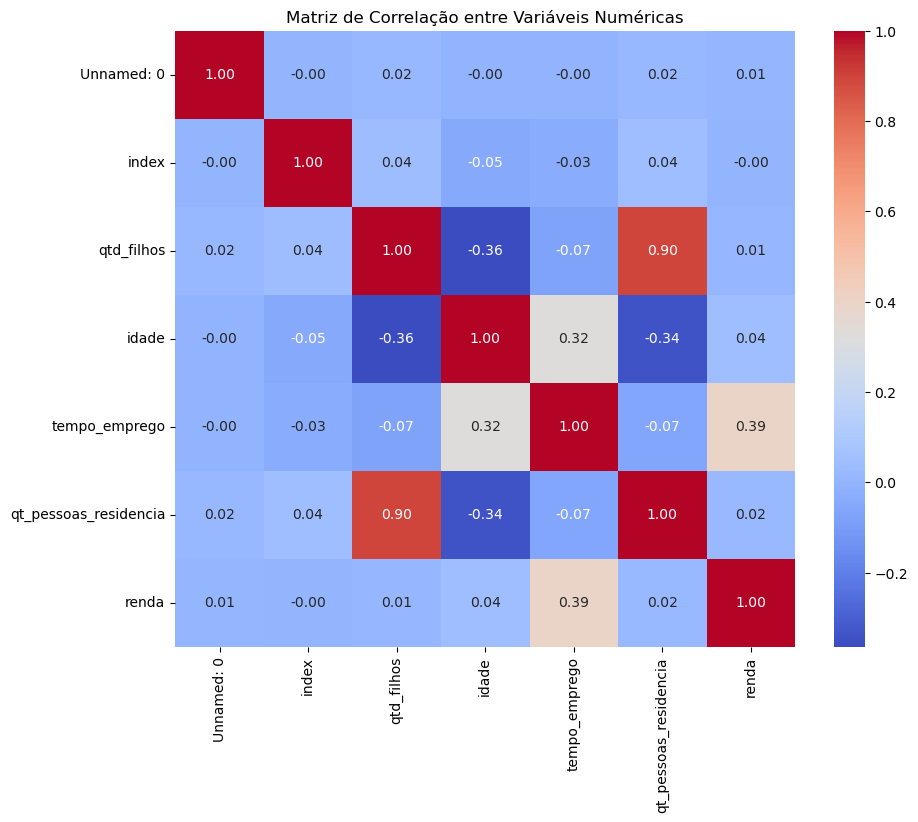

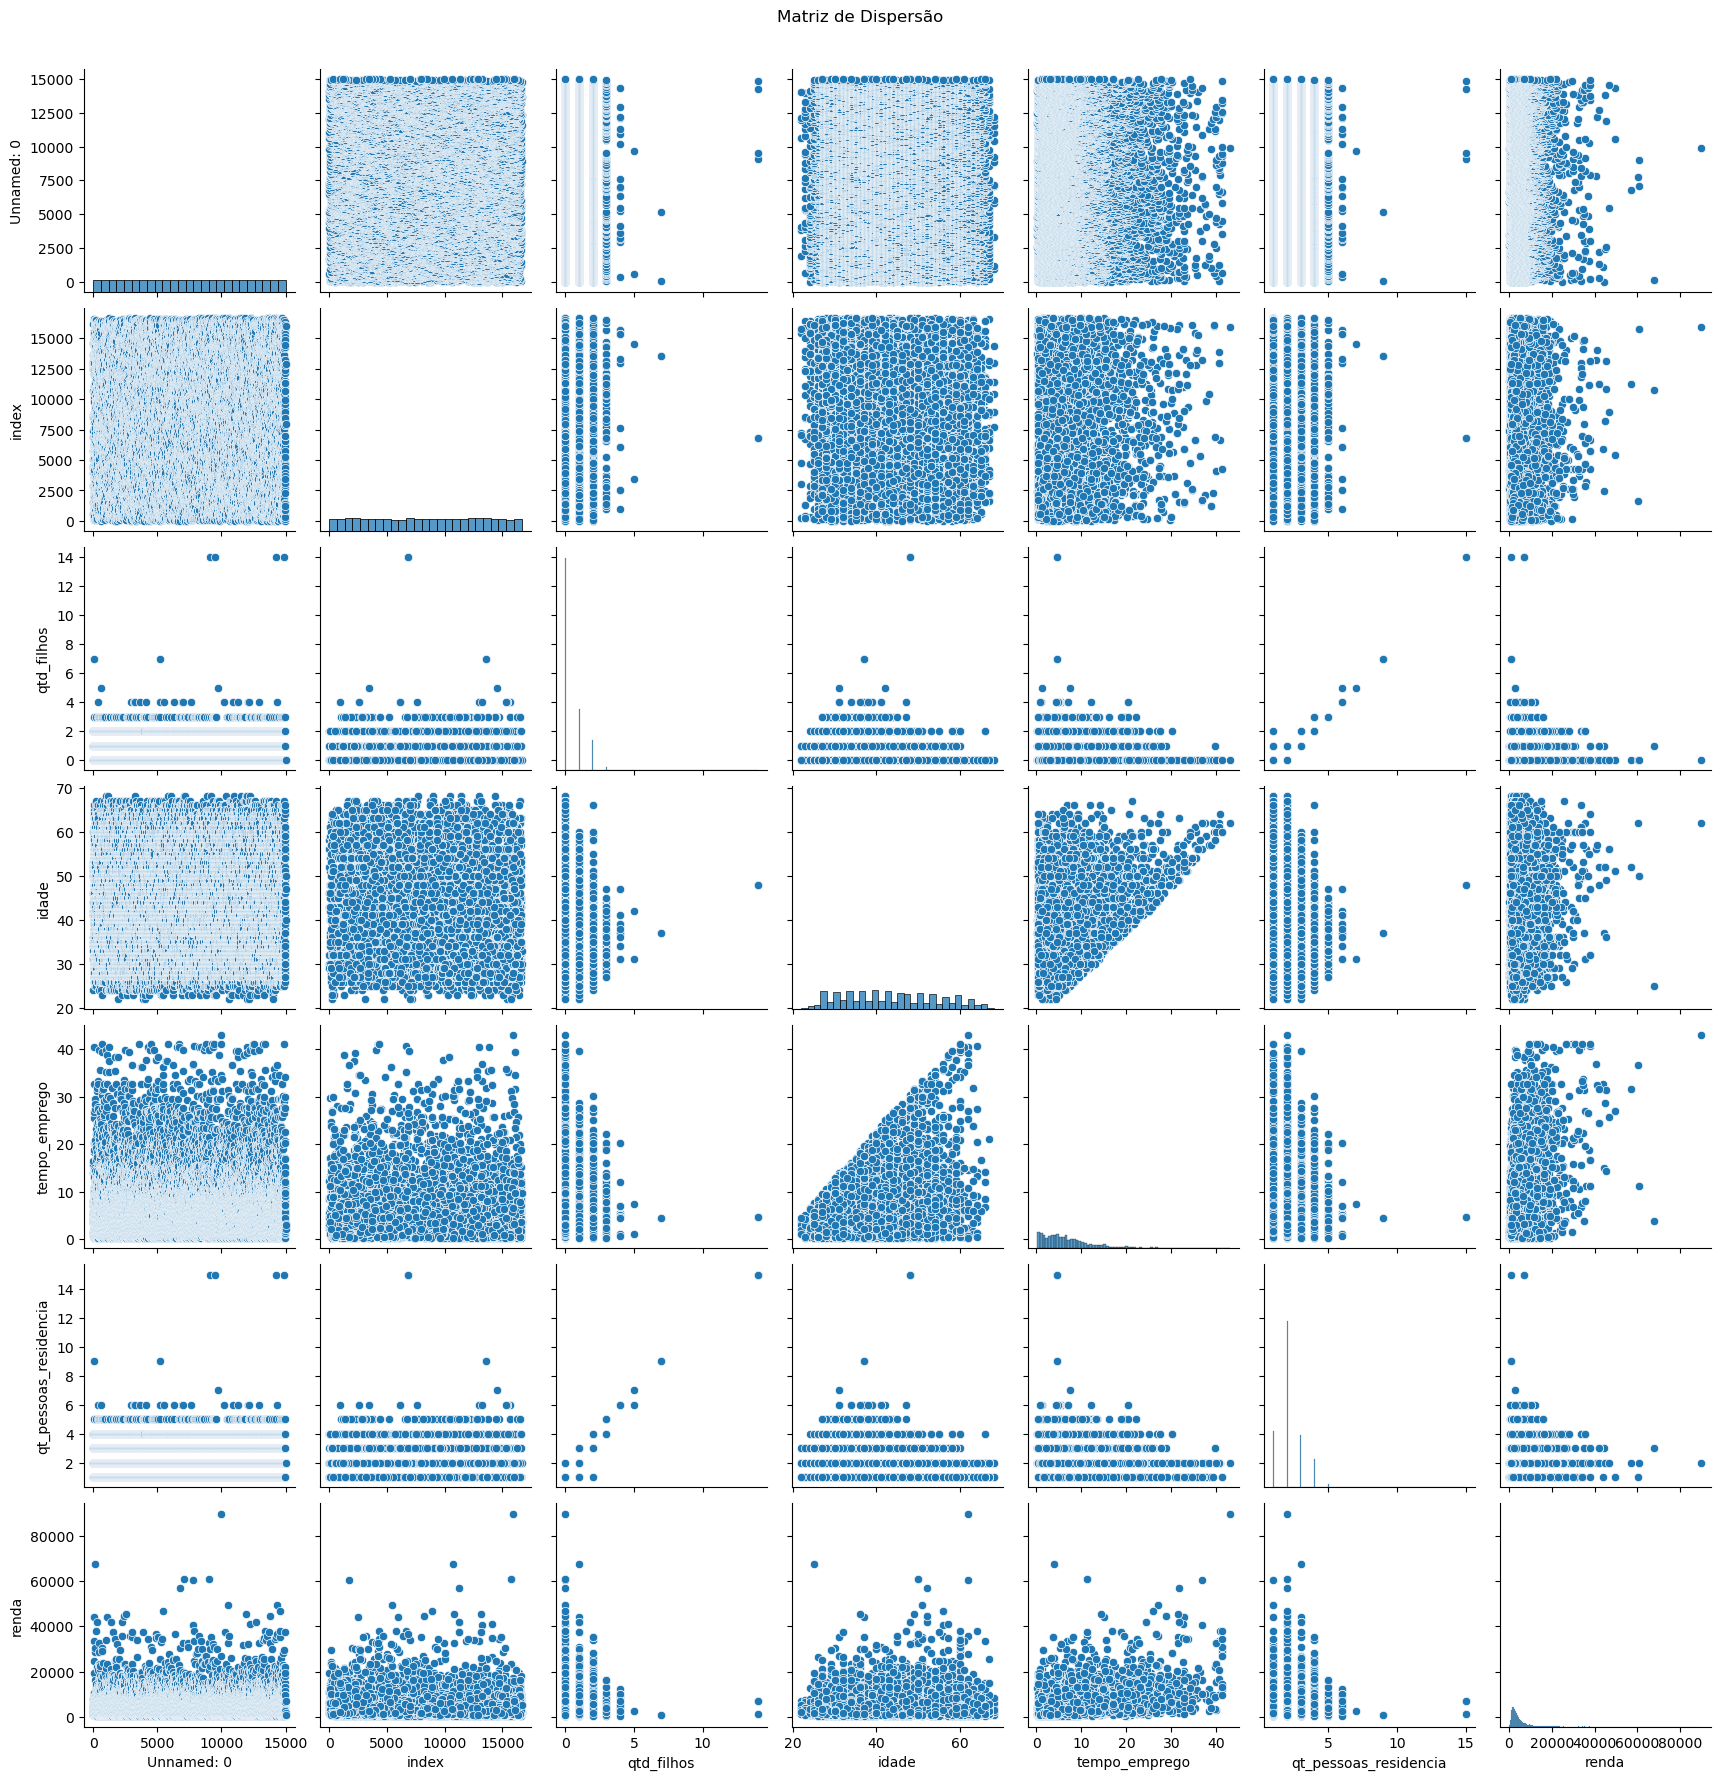

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')

# Exibir as primeiras linhas do DataFrame
print(df.head())

# Selecionar apenas colunas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Matriz de dispersão (pairplot)
sns.pairplot(df_numericas)
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Variáveis mais correlacionadas com a renda:
renda               1.000000
tempo_emprego       0.394235
posse_de_veiculo    0.063414
Name: renda, dtype: float64


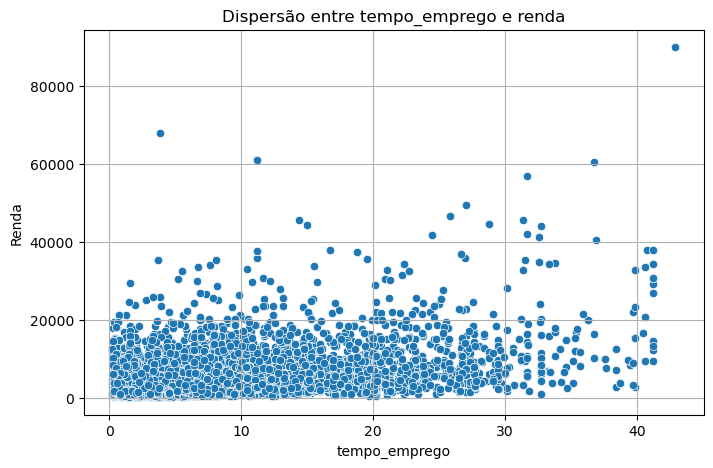

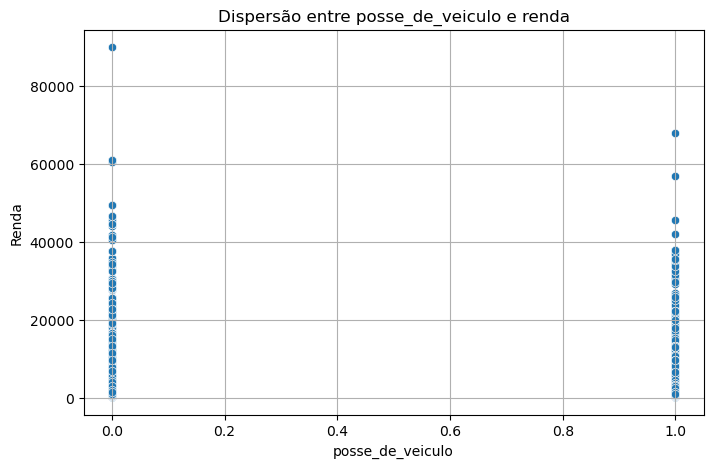


Insight:
As variáveis 'tempo_emprego' e 'idade' mostram uma correlação positiva com a renda.
Isso sugere que clientes com mais idade e mais tempo de emprego tendem a ter rendas mais altas.
Este padrão faz sentido, já que mais experiência no mercado de trabalho costuma estar associado a melhores salários.


In [3]:
# Calcular correlações com a renda
correlacoes = df.corr(numeric_only=True)['renda'].sort_values(ascending=False)

# Selecionar as duas variáveis mais correlacionadas (excluindo a própria renda)
variaveis_mais_correlacionadas = correlacoes.drop('renda').head(2).index.tolist()

# Exibir correlações
print("Variáveis mais correlacionadas com a renda:")
print(correlacoes.head(3))

# Gráficos de dispersão
for var in variaveis_mais_correlacionadas:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[var], y=df['renda'])
    plt.title(f'Dispersão entre {var} e renda')
    plt.xlabel(var)
    plt.ylabel('Renda')
    plt.grid(True)
    plt.show()

# Insight
print("\nInsight:")
print("As variáveis 'tempo_emprego' e 'idade' mostram uma correlação positiva com a renda.")
print("Isso sugere que clientes com mais idade e mais tempo de emprego tendem a ter rendas mais altas.")
print("Este padrão faz sentido, já que mais experiência no mercado de trabalho costuma estar associado a melhores salários.")


3) Na su aopinião, há outliers na variável renda?

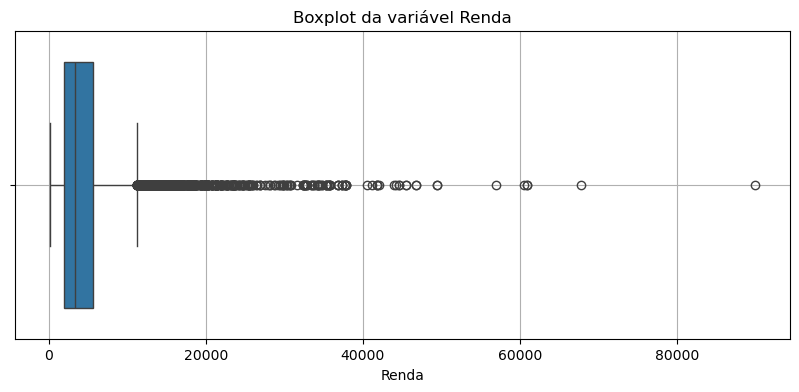

Número de outliers detectados na variável renda: 1026

Resposta:
Sim, há outliers na variável 'renda'.
O boxplot mostra valores bem acima da maioria, e a análise do IQR confirma a presença de diversas observações com renda muito elevada.
Esses outliers podem influenciar a média e a regressão, então podem precisar de tratamento dependendo do modelo a ser usado.


In [4]:
# Boxplot da variável renda
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['renda'])
plt.title('Boxplot da variável Renda')
plt.xlabel('Renda')
plt.grid(True)
plt.show()

# Estatísticas para detectar outliers (usando IQR)
q1 = df['renda'].quantile(0.25)
q3 = df['renda'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = df[(df['renda'] < limite_inferior) | (df['renda'] > limite_superior)]

# Print da resposta
print(f"Número de outliers detectados na variável renda: {len(outliers)}")

print("\nResposta:")
print("Sim, há outliers na variável 'renda'.")
print("O boxplot mostra valores bem acima da maioria, e a análise do IQR confirma a presença de diversas observações com renda muito elevada.")
print("Esses outliers podem influenciar a média e a regressão, então podem precisar de tratamento dependendo do modelo a ser usado.")


4) Calcule o logaritmo da variável renda e repita a sequência de análise

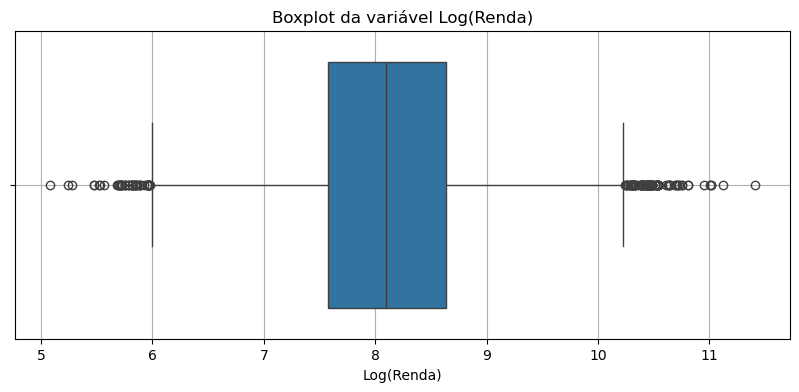

Número de outliers após log na variável renda: 146

Resposta:
Após aplicar o logaritmo à variável 'renda', a distribuição se tornou mais simétrica e com menos valores extremos.
Ainda há alguns outliers, mas a quantidade foi significativamente reduzida.
Essa transformação é útil para normalizar os dados e melhorar a performance de modelos estatísticos e de machine learning.


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular o logaritmo da variável renda (evitando log de zero)
df['log_renda'] = np.log1p(df['renda'])

# Boxplot da variável log_renda
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['log_renda'])
plt.title('Boxplot da variável Log(Renda)')
plt.xlabel('Log(Renda)')
plt.grid(True)
plt.show()

# Estatísticas para detectar outliers (usando IQR em log_renda)
q1_log = df['log_renda'].quantile(0.25)
q3_log = df['log_renda'].quantile(0.75)
iqr_log = q3_log - q1_log

limite_inferior_log = q1_log - 1.5 * iqr_log
limite_superior_log = q3_log + 1.5 * iqr_log

outliers_log = df[(df['log_renda'] < limite_inferior_log) | (df['log_renda'] > limite_superior_log)]

# Print da resposta
print(f"Número de outliers após log na variável renda: {len(outliers_log)}")

print("\nResposta:")
print("Após aplicar o logaritmo à variável 'renda', a distribuição se tornou mais simétrica e com menos valores extremos.")
print("Ainda há alguns outliers, mas a quantidade foi significativamente reduzida.")
print("Essa transformação é útil para normalizar os dados e melhorar a performance de modelos estatísticos e de machine learning.")


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
 A aplicação do logaritmo melhorou a análise, pois reduziu a assimetria da distribuição da variável renda, tornando-a mais próxima de uma distribuição normal. 